In [1]:
import os
import numpy


import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer, GradientDescentOptimizer

import mpl_toolkits.mplot3d
import matplotlib.pyplot as pp


import sys
sys.path.append("..")
from wordsToNumbers import Corpus
from wordsToNumbers import fibonacci_vocabulary

from wordsToQubits import put_word_on_sphere

from utils import get_corpus_from_directory, working_window, get_word_from_sphere

In [2]:
np.random.seed(73)

## Corpus

In [3]:
corpus_path='/Users/voicutu/Documents/GitHub/Qountry/Bebe'

corpus_tex = get_corpus_from_directory(corpus_path, limit=1)

corpus= Corpus(corpus_tex)
print(corpus.prop())

nr. words:72 
nr. distinct words: 8 
len.text/len.vocab:9.0


In [4]:
parameterize_vovabulary = fibonacci_vocabulary(corpus.vocabulary)

### nonsense corpus 

In [5]:
nonsens= [corpus.vocabulary[i] for i in [ np.random.randint(0,8) for j in range(72)]]
               
nonsens_text =" "

for w in nonsens:
          nonsens_text=nonsens_text+" "+w
print("nonsens text:",nonsens_text)
          
nonsens_corpus= Corpus(nonsens_text)
print(nonsens_corpus.prop())

nonsens text:   punct bot punct bot cainele cainele are ursul punct bot frumos ursul este fericit punct frumos frumos este are ursul fericit punct are bot punct este este are fericit ursul frumos frumos frumos cainele are ursul are ursul este este fericit ursul fericit punct bot este are bot ursul are punct fericit punct este ursul frumos cainele frumos fericit punct frumos fericit punct punct cainele este are fericit cainele cainele are bot
nr. words:72 
nr. distinct words: 8 
len.text/len.vocab:9.0


In [6]:
history_lenghth = 3

In [7]:
x_sense,y = working_window(history_lenghth, splited_text=corpus.split_text)
y_sense = [1 for i in range(len(x_sense))]

In [8]:
x_nonsense,y = working_window(history_lenghth, splited_text=nonsens_corpus.split_text)
y_nonsense = [0 for i in range(len(x_nonsense))]

In [9]:
x_sense[0]

['ursul', 'are', 'bot']

In [10]:
x_nonsense[0]

['punct', 'bot', 'punct']

In [11]:
x_merge=x_sense.copy()
for piece in x_nonsense:
    x_merge.append(piece)
print(len(x_merge))

y_merge=y_sense.copy()
for piece in y_nonsense:
    y_merge.append(piece)
print(len(y_merge))

136
136


## Diagram embeding

### Initial distribution

keys dict_keys(['cainele', 'ursul', 'bot', 'are', 'este', 'fericit', 'punct', 'frumos'])


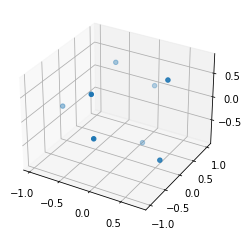

In [12]:
print("keys",parameterize_vovabulary.keys())

x_old=[]
y_old=[]
z_old=[]

for key in parameterize_vovabulary.keys():
    x_old.append(parameterize_vovabulary[key][0])
    y_old.append(parameterize_vovabulary[key][1])
    z_old.append(parameterize_vovabulary[key][2])
    
pp.figure().add_subplot(111, projection='3d').scatter(x_old, y_old, z_old);
pp.show()

In [13]:
vocabulary_parameters= [parameterize_vovabulary[key] for key in parameterize_vovabulary.keys()]
vocabulary_parameters

[[0.0, 1.0, 0.0],
 [-0.516050715285824, 0.7142857142857143, 0.4727447277551981],
 [0.07898983319899221, 0.4285714285714286, -0.9000484080667219],
 [0.6021982974369868, 0.1428571428571429, 0.7854610412354569],
 [-0.9746135928368869, -0.1428571428571428, -0.17239542161051932],
 [0.7623395769811511, -0.4285714285714286, -0.4849380372588282],
 [-0.18168516629672943, -0.7142857142857142, 0.6758597626098751],
 [-0.0, -1.0, -0.0]]

In [25]:
def update_vocabulary(parameterize_vovabulary, vocabulary_parameters):
    
    
    
    print("\n\n ###vp",vocabulary_parameters)
    i=0
    for key in parameterize_vovabulary.keys():
        parameterize_vovabulary[key]=[k for k in vocabulary_parameters[i]]
        i=i+1
    

    print("pv:",parameterize_vovabulary)
    return parameterize_vovabulary

In [26]:
dev = qml.device("default.qubit", wires=6)

@qml.qnode(dev)
def sense_circutis(x):
    
    #words embeding 
    for i in range(len(x)):
        
        put_word_on_sphere(x[i], qubit=i)
        
        
    # interaction
    for i in range(1,len(x)):
        qml.CNOT(wires=[0,i])
        
    return  qml.expval(qml.PauliZ(0)) # aici trbuie verificat daca am facut bine 
                                      # si nu cumva trebuie s apun ccond ca restuls a fie 0

In [27]:
parameterize_vovabulary

{'cainele': [0.0, 1.0, 0.0],
 'ursul': [-0.516050715285824, 0.7142857142857143, 0.4727447277551981],
 'bot': [0.07898983319899221, 0.4285714285714286, -0.9000484080667219],
 'are': [0.6021982974369868, 0.1428571428571429, 0.7854610412354569],
 'este': [-0.9746135928368869, -0.1428571428571428, -0.17239542161051932],
 'fericit': [0.7623395769811511, -0.4285714285714286, -0.4849380372588282],
 'punct': [-0.18168516629672943, -0.7142857142857142, 0.6758597626098751],
 'frumos': [-0.0, -1.0, -0.0]}

In [28]:
x_sense[0]

['ursul', 'are', 'bot']

In [29]:
parameterize_vovabulary['ursul']

[-0.516050715285824, 0.7142857142857143, 0.4727447277551981]

In [30]:
"ursul are bot punct"

x_vec=[ parameterize_vovabulary[w] for w in x_sense[0]]



print(qml.draw(sense_circutis)(x_vec))

 0: ──RY(5.2)────RZ(-0.945)──╭C──╭C──┤ ⟨Z⟩ 
 1: ──RY(0.667)──RZ(0.233)───╰X──│───┤     
 2: ──RY(-3.59)──RZ(1.39)────────╰X──┤     



In [31]:
pred = sense_circutis(x_vec)
print("pred",pred)

pred 0.4727447277551978


### Sense learning

In [32]:
def cost(params, x,y):
    
    
    global parameterize_vovabulary
    parameterize_vovabulary = update_vocabulary(parameterize_vovabulary, params)
    print("\n !!!!pv:",parameterize_vovabulary)
    print("\n\n \n params:",params)
    x_vec=[[ parameterize_vovabulary[w] for w in piece] for piece in x] 
    
    
    predictions = [sense_circutis(w_input) for w_input in x_vec ]

    c=0.0
    for i in range(len(predictions)):
        c = c+ (predictions[i] - y[i])**2

    c=c/len(predictions)

    return np.array(c)

In [33]:
def sense_accuracy(predictions, y):

    ac=0
    int_pred= [int(predict+0.5) for predict in predictions ]
    print("predictions", int_pred)
    for i in range(len(y)):
        if int(y[i])==int_pred[i]:
            ac=ac+1
            
    return ac/len(y)

#### Training

In [36]:
## Model parameters 

params= vocabulary_parameters

learning_rate= 0.6
opt = AdamOptimizer(learning_rate, beta1=0.9, beta2=0.999)

nr_epochs= 20

In [37]:
ls_progres=[]
ac_progres=[]
for e in range(nr_epochs):
    params, ls = opt.step_and_cost(lambda p: cost( params=p, x=x_merge, y=y_merge),params)

    print("Iter:{} | train_cost:{}".format(e, ls))
    ls_progres.append(ls)


    if e%10==0:
        
        parameterize_vovabulary = update_vocabulary(parameterize_vovabulary, params)
        x_vec=[[ parameterize_vovabulary[w] for w in piece] for piece in x_merge]
    
        predictions = [sense_circutis(w_input) for w_input in x_vec ]
        
        
        ac=sense_accuracy(predictions, y=y_merge)
        ac_progres.append(ac)
        
        print("ac:",ac)




 ###vp Autograd SequenceBox with value [[0.0, 1.0, 0.0], [-0.516050715285824, 0.7142857142857143, 0.4727447277551981], [0.07898983319899221, 0.4285714285714286, -0.9000484080667219], [0.6021982974369868, 0.1428571428571429, 0.7854610412354569], [-0.9746135928368869, -0.1428571428571428, -0.17239542161051932], [0.7623395769811511, -0.4285714285714286, -0.4849380372588282], [-0.18168516629672943, -0.7142857142857142, 0.6758597626098751], [-0.0, -1.0, -0.0]]
pv: {'cainele': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2b0740600>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2b06262c0>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2b0626d80>], 'ursul': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2b0626e00>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2b0626940>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2b0626f80>], 'bot': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2b0626d00>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2

Iter:1 | train_cost:0.504959401887454


 ###vp Autograd SequenceBox with value [[0.0, 2.0020329924633042, 0.0], [-1.574935088557105, 1.775939934796068, 0.31752365444856684], [1.2708015122056808, 1.5167216862277724, 0.2731904928999641], [1.5033605323277794, 0.8800566675778397, 0.4375559926900027], [-1.9030681680371655, -0.9019166755959633, 0.8805600233012043], [1.7499525272937058, -1.4111500372740184, 0.624425387840731], [-0.9513217994731151, -1.6185103753749988, 0.41891573117352804], [-0.0, -2.0020335804680847, -0.0]]
pv: {'cainele': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290a82e80>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290a82f40>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290a82c80>], 'ursul': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290a823c0>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290a82b80>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290a82cc0>], 'bot': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290

Iter:3 | train_cost:0.3318541578492034


 ###vp Autograd SequenceBox with value [[0.0, 2.5673733700865893, 0.0], [-1.439277858991849, 1.664821598237187, 1.2236150560753283], [1.93299945277631, 2.1597254613032897, 1.3017909415401097], [1.72921045994795, 0.6874368010659637, 1.1094596948347208], [-2.4411039250135245, -1.337447757514493, 1.4841741831191233], [2.2672225175620144, -1.9089819956170564, 1.395585437736187], [-0.5226449876283625, -1.6211567749780909, 1.205016247112224], [-0.0, -2.5673742901800045, -0.0]]
pv: {'cainele': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2905fe780>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2905fe340>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2905fe500>], 'ursul': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2905fef80>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2905fe9c0>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2905fe400>], 'bot': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2905fe940>

Iter:5 | train_cost:0.3239734805514337


 ###vp Autograd SequenceBox with value [[0.0, 2.9679864831267775, 0.0], [-1.4316447969054689, 1.677691786990355, 1.8703592747576707], [2.2627095608600705, 2.5798516701721717, 2.119282889593025], [1.8982357498178106, 0.5451491005954597, 1.5940349733000478], [-2.9792946126569957, -2.0589792550171104, 1.8474478144463578], [2.640444243112048, -2.2718647235552827, 1.9345619511632752], [-0.25132238693966186, -1.7168702683283936, 1.7525381839277017], [-0.0, -2.9679876387828372, -0.0]]
pv: {'cainele': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290745b80>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290745640>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290745b00>], 'ursul': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290745c00>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290745bc0>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290745940>], 'bot': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290

Iter:7 | train_cost:0.3264053101944437


 ###vp Autograd SequenceBox with value [[0.0, 3.2727067623013943, 0.0], [-2.0026901367720495, 2.263054289027065, 2.247970964336032], [2.4662635026712025, 2.886862584059953, 2.7636221117242448], [2.1983863013635214, 0.6144193176995146, 1.8535742941207296], [-3.484358221833103, -2.8801861065579293, 2.081495983376492], [2.9477683565568955, -2.5836351411948177, 2.3183251614723708], [-0.2485734741965019, -2.182254291592319, 2.0625151632222205], [-0.0, -3.272708097314462, -0.0]]
pv: {'cainele': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2b078bb40>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2b078bd40>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2b078b580>], 'ursul': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2b078bbc0>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2b078b980>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2b078b1c0>], 'bot': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2b078b68

Iter:9 | train_cost:0.3201158567767862


 ###vp Autograd SequenceBox with value [[0.0, 3.5125622367780425, 0.0], [-2.715789823009021, 2.9814215414261405, 2.4760535854661767], [2.6195784461442915, 3.1266397472204277, 3.2737408459377146], [2.5832202203402908, 0.8164920805626188, 1.9639332781815875], [-3.925366746353297, -3.6761797257836206, 2.2437160289609226], [3.2161308708864276, -2.87006714717735, 2.5924075750109177], [-0.35123898073503884, -2.794047635720113, 2.229236212432864], [-0.0, -3.512563713110517, -0.0]]
pv: {'cainele': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290cf48c0>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290cf4a00>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290cf4800>], 'ursul': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290cf4940>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290cf47c0>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290cf4780>], 'bot': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290cf44

Iter:11 | train_cost:0.315974086050662


 ###vp Autograd SequenceBox with value [[0.0, 3.705080135747642, 0.0], [-3.3788622290221237, 3.6445763951336123, 2.633103704859987], [2.7545009300558574, 3.3224411381038146, 3.6787987183132187], [2.976509591857906, 1.0706080108658225, 1.9937951902830435], [-4.294609814696344, -4.377214985482861, 2.3650694310895974], [3.4567531032721384, -3.1397490801585834, 2.7860421141319494], [-0.4853376203845941, -3.401023800479304, 2.3214645056017904], [-0.0, -3.70508172562255, -0.0]]
pv: {'cainele': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2c3de73c0>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2c3de7940>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2c3de7e40>], 'ursul': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2c3de7cc0>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2c3de72c0>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2c3de7140>], 'bot': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe2c3de7480

Iter:13 | train_cost:0.31504666771793194


 ###vp Autograd SequenceBox with value [[0.0, 3.8614817625391162, 0.0], [-3.916587124587049, 4.182542400150927, 2.761194570796634], [2.885294854691811, 3.4875404320127017, 4.00039040924903], [3.324351702859784, 1.3113872582080583, 1.9959193015768368], [-4.596036615163382, -4.9530268600336305, 2.462770223700798], [3.6748010937626736, -3.3950395351887956, 2.919472508466766], [-0.6073882703771368, -3.921522393557766, 2.3855909517705283], [-0.0, -3.8614834447483366, -0.0]]
pv: {'cainele': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290ef04c0>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290ef0b40>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290ef0c00>], 'ursul': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290ef0900>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290ef0d00>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290ef0cc0>], 'bot': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290ef0bc0>

Iter:15 | train_cost:0.31560604292743877


 ###vp Autograd SequenceBox with value [[0.0, 3.9895420114777655, 0.0], [-4.314922120832281, 4.584392354706251, 2.880455065648697], [3.0182668654887093, 3.6301087062761175, 4.254870740562735], [3.601001823311813, 1.4971498780189287, 2.005372388682783], [-4.837610589931002, -5.398313584701719, 2.5465655792383672], [3.8728209133540465, -3.6358531670377787, 3.0075371182806574], [-0.6950349443036625, -4.324426877980994, 2.4487303969562073], [-0.0, -3.9895437693652, -0.0]]
pv: {'cainele': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290ed78c0>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290ed7a00>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290ed7800>], 'ursul': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290ed7940>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290ed77c0>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290ed7780>], 'bot': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290ed7440>,

Iter:17 | train_cost:0.3162304524367201


 ###vp Autograd SequenceBox with value [[0.0, 4.0949427768837445, 0.0], [-4.585154225237806, 4.862297482585072, 2.999311977507649], [3.1557848863816123, 3.755430056556213, 4.454944627276867], [3.8014694770432325, 1.611107217440223, 2.0401149965102565], [-5.027987952819545, -5.721169786269619, 2.621980028754391], [4.052184078544792, -3.8612119612766858, 3.0615587746374167], [-0.7414834084940244, -4.608604816460718, 2.5236057573692126], [-0.0, -4.094944597120958, -0.0]]
pv: {'cainele': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290e9e700>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290e9ea80>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290e9ec40>], 'ursul': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290e9ec00>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290e9ed40>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290e9e300>], 'bot': [<autograd.numpy.numpy_boxes.ArrayBox object at 0x7fe290e9eb40>, 

Iter:19 | train_cost:0.31632365142808455


In [42]:
parameterize_vovabulary=update_vocabulary(parameterize_vovabulary, params)
parameterize_vovabulary



 ###vp [[0.0, 4.181994326873847, 0.0], [-4.746999227562753, 5.035621558110675, 3.12005583872423], [3.298130268040508, 3.867031218337843, 4.610708044821885], [3.9324109236618185, 1.6549289973703898, 2.1044464744243316], [-5.175326827854144, -5.9359464776627275, 2.692044530076764], [4.213762921281883, -4.06995621011381, 3.0904107185378975], [-0.74936229756269, -4.787225621338677, 2.6135001843151096], [-0.0, -4.181996198657925, -0.0]]
pv: {'cainele': [0.0, 4.181994326873847, 0.0], 'ursul': [-4.746999227562753, 5.035621558110675, 3.12005583872423], 'bot': [3.298130268040508, 3.867031218337843, 4.610708044821885], 'are': [3.9324109236618185, 1.6549289973703898, 2.1044464744243316], 'este': [-5.175326827854144, -5.9359464776627275, 2.692044530076764], 'fericit': [4.213762921281883, -4.06995621011381, 3.0904107185378975], 'punct': [-0.74936229756269, -4.787225621338677, 2.6135001843151096], 'frumos': [-0.0, -4.181996198657925, -0.0]}


{'cainele': [0.0, 4.181994326873847, 0.0],
 'ursul': [-4.746999227562753, 5.035621558110675, 3.12005583872423],
 'bot': [3.298130268040508, 3.867031218337843, 4.610708044821885],
 'are': [3.9324109236618185, 1.6549289973703898, 2.1044464744243316],
 'este': [-5.175326827854144, -5.9359464776627275, 2.692044530076764],
 'fericit': [4.213762921281883, -4.06995621011381, 3.0904107185378975],
 'punct': [-0.74936229756269, -4.787225621338677, 2.6135001843151096],
 'frumos': [-0.0, -4.181996198657925, -0.0]}

### Results

In [43]:
import matplotlib.pyplot as plt

last loss: 0.31632365142808455


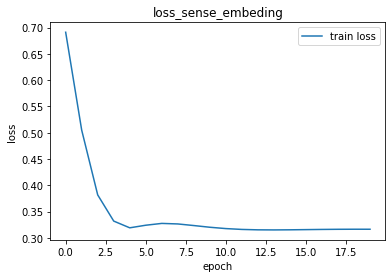

In [44]:
fig = plt.figure()
plt.plot([x for x in range(0,len(ls_progres))],np.array(ls_progres),label="train loss")


plt.legend()
plt.title("loss_sense_embeding",)
plt.xlabel("epoch")
plt.ylabel("loss")

print("last loss:",ls_progres[-1])

accuracy loss: 0.5147058823529411


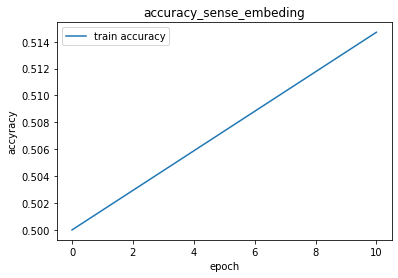

In [45]:
fig = plt.figure()
plt.plot([x for x in range(0,len(ac_progres)*10,10)],np.array(ac_progres),label="train accuracy")


plt.legend()
plt.title("accuracy_sense_embeding",)
plt.xlabel("epoch")
plt.ylabel("accyracy")

print("accuracy loss:",ac_progres[-1])

In [46]:
parameterize_vovabulary

{'cainele': [0.0, 4.181994326873847, 0.0],
 'ursul': [-4.746999227562753, 5.035621558110675, 3.12005583872423],
 'bot': [3.298130268040508, 3.867031218337843, 4.610708044821885],
 'are': [3.9324109236618185, 1.6549289973703898, 2.1044464744243316],
 'este': [-5.175326827854144, -5.9359464776627275, 2.692044530076764],
 'fericit': [4.213762921281883, -4.06995621011381, 3.0904107185378975],
 'punct': [-0.74936229756269, -4.787225621338677, 2.6135001843151096],
 'frumos': [-0.0, -4.181996198657925, -0.0]}

In [63]:
words = []
for k in parameterize_vovabulary:
    words.append(parameterize_vovabulary[k])
print(words)

[[0.0, 4.181994326873847, 0.0], [-4.746999227562753, 5.035621558110675, 3.12005583872423], [3.298130268040508, 3.867031218337843, 4.610708044821885], [3.9324109236618185, 1.6549289973703898, 2.1044464744243316], [-5.175326827854144, -5.9359464776627275, 2.692044530076764], [4.213762921281883, -4.06995621011381, 3.0904107185378975], [-0.74936229756269, -4.787225621338677, 2.6135001843151096], [-0.0, -4.181996198657925, -0.0]]


### New distribution

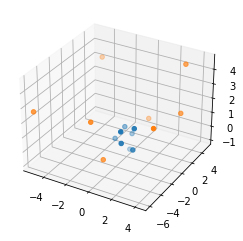

In [57]:


x_new=[]
y_new=[]
z_new=[]

for key in parameterize_vovabulary.keys():
    x_new.append(parameterize_vovabulary[key][0])
    y_new.append(parameterize_vovabulary[key][1])
    z_new.append(parameterize_vovabulary[key][2])
    
    
fig = plt.figure()
ax = plt.axes(projection='3d')
    
ax.scatter(x_old, y_old, z_old,)
ax.scatter(x_new, y_new, z_new,)

pp.show()

## Prediction

In [58]:
x_sense,y = working_window(history_lenghth, splited_text=corpus.split_text)

In [59]:
print(x_sense)
print(y)

[['ursul', 'are', 'bot'], ['are', 'bot', 'punct'], ['bot', 'punct', 'cainele'], ['punct', 'cainele', 'are'], ['cainele', 'are', 'bot'], ['are', 'bot', 'punct'], ['bot', 'punct', 'ursul'], ['punct', 'ursul', 'este'], ['ursul', 'este', 'fericit'], ['este', 'fericit', 'punct'], ['fericit', 'punct', 'cainele'], ['punct', 'cainele', 'este'], ['cainele', 'este', 'fericit'], ['este', 'fericit', 'punct'], ['fericit', 'punct', 'cainele'], ['punct', 'cainele', 'este'], ['cainele', 'este', 'frumos'], ['este', 'frumos', 'punct'], ['frumos', 'punct', 'cainele'], ['punct', 'cainele', 'are'], ['cainele', 'are', 'bot'], ['are', 'bot', 'frumos'], ['bot', 'frumos', 'punct'], ['frumos', 'punct', 'cainele'], ['punct', 'cainele', 'frumos'], ['cainele', 'frumos', 'are'], ['frumos', 'are', 'bot'], ['are', 'bot', 'punct'], ['bot', 'punct', 'ursul'], ['punct', 'ursul', 'frumos'], ['ursul', 'frumos', 'are'], ['frumos', 'are', 'bot'], ['are', 'bot', 'punct'], ['bot', 'punct', 'ursul'], ['punct', 'ursul', 'ferici

In [62]:

nr_words = len(parameterize_vovabulary)
dev = qml.device("default.qubit", wires=history_lenghth+nr_words*2) 

In [ ]:

def put_word_on_sphere_control(params, qubit,control):
    """

    :param params: [x, y ,z ]
    :param qubit:
    """

    if params[2] != 0.0:
        theta = np.arctan(np.sqrt(params[0] * params[0] + params[1] * params[1]) / params[2])
    else:
        theta = np.pi / 2

    if params[0] != 0.0:
        phi = np.arctan(params[1] / params[0])
    else:
        phi = np.pi / 2

    if params[1] * params[1] == 1.0:
        phi = np.pi / 2
        theta = -params[1] * np.pi / 2

    if (params[0] > 0) and (params[1] >= 0) and (params[2] > 0):
        theta = theta

    elif (params[0] < 0) and (params[1] >= 0) and (params[2] > 0):
        theta = 2 * np.pi - theta

    elif (params[0] > 0) and (params[1] <= 0) and (params[2] > 0):
        theta = -2 * np.pi + theta

    elif (params[0] < 0) and (params[1] <= 0) and (params[2] > 0):
        theta = 2 * np.pi - theta

    elif (params[0] < 0) and (params[1] <= 0) and (params[2] < 0):
        theta = np.pi - theta

    elif (params[0] < 0) and (params[1] >= 0) and (params[2] < 0):
        theta = np.pi - theta

    elif (params[0] > 0) and (params[1] <= 0) and (params[2] < 0):
        theta = np.pi + theta

    else:  # (params[0] > 0) and (params[1] > 0) and (params[2] < 0)
        theta = -np.pi + theta

    qml.CRY(theta, wires=[control, qubit])
    qml.CRZ(phi, wires=[control, qubit])


In [ ]:
@qml.qnode(dev)
def next_gen(params, x, obs='z', nr_words= 8):
    """
    obs:'z', 'x' or 'y'
    """
    ###########################
    # initialize the circuit#
    # past words 
    for i in range(len(x)):
        put_word_on_sphere(x[i], qubit=i)

    # supeerposition 
    for i in range(nr_words):
        control_q=i+len(x)
        target=i+len(x)+nr_words
        pml.Hadamrd(control_q)

        put_word_on_sphere_control(words[i], target,control_q)
        
    ###########################
    # CX
    # interaction
    for i in range(1,len(x)):
        qml.CNOT(wires=[0,i])
        
    for i in range(len(x)+nr_words,len(x)+2*nr_words):
        qml.CNOT(wires=[0,i])
    
    #############################
    #PK
    
    #############################
    ## Reverse 
    # CX
    # interaction
    for i in range(1,len(x)):
        qml.CNOT(wires=[0,i])
        
    for i in range(len(x)+nr_words,len(x)+2*nr_words):
        qml.CNOT(wires=[0,i])
    #############################
    ## Reverse 
    # CX
    for i in range(1,len(x)):
        qml.CNOT(wires=[0,i])
        
    for i in range(len(x)+nr_words,len(x)+2*nr_words):
        qml.CNOT(wires=[0,i])
    #############################
    ## Reverse
    # supeerposition 
    for i in range(nr_words):
        control_q=i+len(x)
        target=i+len(x)+nr_words
        qml.adjoint(put_word_on_sphere_control)(words[i], target,control_q)
    #############################
    
    # diffuser
    
    
    for param in params:
        layer_type1(param, wires=[0,1,2])
    #circuit_initializer(x) # just for a test 


    # measure 
    if obs=='z':
        return  qml.expval(qml.PauliZ(3))
    if obs=='x':
        return qml.expval(qml.PauliX(3))
    if obs=='y':
        return qml.expval(qml.PauliY(3))